In [2]:
import pandas as pd

df = pd.read_csv("PreprocessedData.csv")

names = list(df['State_Name'].unique())

In [3]:
df["State_Name"] = df["State_Name"].astype("category").cat.codes

codes = list(df['State_Name'].unique())

codesState = dict(zip(names, codes))
nameCode = dict(zip(codes, names))

In [3]:
codesState

{'Andhra Pradesh': 1,
 'Ladakh': 17,
 'Kerala': 16,
 'Karnataka': 15,
 'Jammu and Kashmir': 13,
 'Jharkhand': 14,
 'Haryana': 11,
 'Himachal Pradesh': 12,
 'Lakshadweep': 18,
 'Gujarat': 10,
 'Dadra and Nagar Haveli and Daman and Diu': 7,
 'Delhi': 8,
 'Chhattisgarh': 6,
 'Chandigarh': 5,
 'Bihar': 4,
 'Assam': 3,
 'Goa': 9,
 'Maharashtra': 20,
 'Meghalaya': 22,
 'Manipur': 21,
 'West Bengal': 35,
 'Uttarakhand': 34,
 'Uttar Pradesh': 33,
 'Tripura': 32,
 'Tamil Nadu': 30,
 'Andaman and Nicobar Islands': 0,
 'Telangana': 31,
 'Rajasthan': 28,
 'Puducherry': 26,
 'Punjab': 27,
 'Odisha': 25,
 'Nagaland': 24,
 'Mizoram': 23,
 'Madhya Pradesh': 19,
 'Sikkim': 29,
 'Arunachal Pradesh': 2}

In [3]:
nameCode

{1: 'Andhra Pradesh',
 17: 'Ladakh',
 16: 'Kerala',
 15: 'Karnataka',
 13: 'Jammu and Kashmir',
 14: 'Jharkhand',
 11: 'Haryana',
 12: 'Himachal Pradesh',
 18: 'Lakshadweep',
 10: 'Gujarat',
 7: 'Dadra and Nagar Haveli and Daman and Diu',
 8: 'Delhi',
 6: 'Chhattisgarh',
 5: 'Chandigarh',
 4: 'Bihar',
 3: 'Assam',
 9: 'Goa',
 20: 'Maharashtra',
 22: 'Meghalaya',
 21: 'Manipur',
 35: 'West Bengal',
 34: 'Uttarakhand',
 33: 'Uttar Pradesh',
 32: 'Tripura',
 30: 'Tamil Nadu',
 0: 'Andaman and Nicobar Islands',
 31: 'Telangana',
 28: 'Rajasthan',
 26: 'Puducherry',
 27: 'Punjab',
 25: 'Odisha',
 24: 'Nagaland',
 23: 'Mizoram',
 19: 'Madhya Pradesh',
 29: 'Sikkim',
 2: 'Arunachal Pradesh'}

<AxesSubplot:>

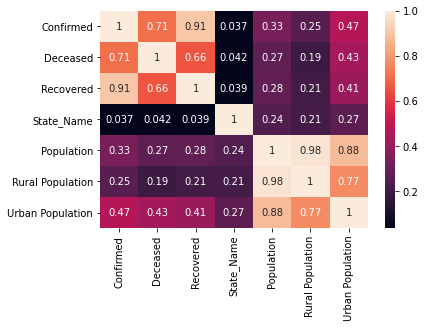

In [4]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(df.corr(),annot=True)

In [5]:
#_____Don't Edit______

df.drop("State", axis=1, inplace=True)

In [6]:
#_____Don't Edit______

df['Date'] =pd.to_datetime(df.Date)

df.sort_values(by=['Date', 'State_Name'],inplace=True)

In [7]:
df_list = [0]*len(df.State_Name.unique())

df_values = []

In [8]:
df.head()

,Date,Confirmed,Deceased,Recovered,State_Name,Population,Rural Population,Urban Population
25,2020-03-14,0,0,0,0,380581.0,237093.0,143488.0
0,2020-03-14,1,0,0,1,49577103.0,34966693.0,14610410.0
35,2020-03-14,0,0,0,2,1383727.0,1066358.0,317369.0
15,2020-03-14,0,0,0,3,31205576.0,26807034.0,4398542.0
14,2020-03-14,0,0,0,4,104099452.0,92341436.0,11758016.0


In [19]:
for ind in df.index: 
    df_list[df['State_Name'][ind]] += df['Confirmed'][ind]
    df_values.append(df_list[df['State_Name'][ind]])

In [20]:
df["Total_Confirmed"] = df_values

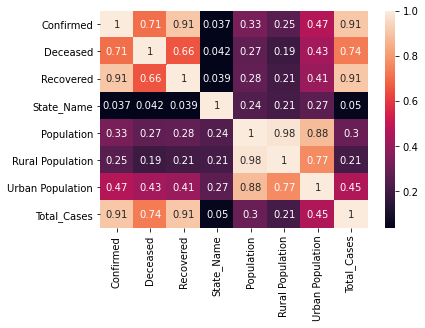

In [14]:
sns.heatmap(df.corr(), annot=True)

In [16]:
#_______Don't Edit______

df.drop(['Population', 'Rural Population', 'Urban Population'], axis = 1, inplace=True)

In [21]:
df_list = [0]*len(df.State_Name.unique())

df_values = []

for ind in df.index: 
    df_list[df['State_Name'][ind]] += df['Deceased'][ind]
    df_values.append(df_list[df['State_Name'][ind]])
    
df["Total_Deceased"] = df_values

In [22]:
df_list = [0]*len(df.State_Name.unique())

df_values = []

for ind in df.index: 
    df_list[df['State_Name'][ind]] += df['Recovered'][ind]
    df_values.append(df_list[df['State_Name'][ind]])
    
df["Total_Recovered"] = df_values

In [25]:
df.drop('Total_Cases', inplace=True, axis=1)

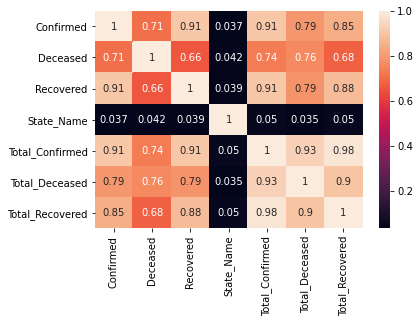

In [27]:
sns.heatmap(df.corr(),annot=True)

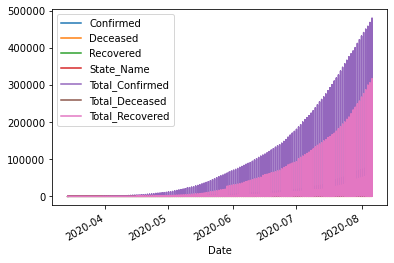

In [38]:
df.set_index("Date").plot()

In [39]:
df.to_csv("PreprocessedData2.csv")